# 파일에서 RDD 생성

## 문제 S-2: RDD를 사용하여 단어 빈도를 계산하고, 그래프 그리기

#### 1. spark session start

In [1]:
import pyspark 

spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("midprac00")\
    .config(conf=pyspark.SparkConf())\
    .getOrCreate()

21/10/23 10:45:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


#### 2. RDD 생성 from file

In [4]:
myRdd = spark.sparkContext.textFile("data/ds_bigdata_wiki.txt")

myRdd.take(10)

['Big data',
 '활용사례 및 의의[편집]',
 '정치 및 사회[편집]',
 '2008년 미국 대통령 선거[편집]',
 "2008년 미국 대통령 선거에서 버락 오바마 미국 대통령 후보는 다양한 형태의 유권자 데이터베이스를 확보하여 이를 분석, 활용한 '유권자 맞춤형 선거 전략'을 전개했다. 당시 오바마 캠프는 인종, 종교, 나이, 가구형태, 소비수준과 같은 기본 인적 사항으로 유권자를 분류하는 것을 넘어서서 과거 투표 여부, 구독하는 잡지, 마시는 음료 등 유권자 성향까지 전화나 개별 방문을 또는 소셜 미디어를 통해 유권자 정보를 수집하였다. 수집된 데이터는 오바마 캠프 본부로 전송되어 유권자 데이터베이스를 온라인으로 통합관리하는 ‘보트빌더(VoteBuilder.com)’시스템의 도움으로 유권자 성향 분석, 미결정 유권자 선별 , 유권자에 대한 예측을 해나갔다. 이를 바탕으로‘유권자 지도’를 작성한 뒤 ‘유권자 맞춤형 선거 전략’을 전개하는 등 오바마 캠프는 비용 대비 효과적인 선거를 치를 수 있었다.",
 '',
 '대한민국 제19대 총선[편집]',
 '중앙선거관리위원회는 대한민국 제19대 총선부터 소셜 네트워크 등 인터넷 상의 선거 운동을 상시 허용하였다.[15] 이에 소셜 미디어 상에서 선거 관련 데이터는 증폭되었으며, 2010년 대한민국 제5회 지방 선거 및 2011년 대한민국 재보궐선거에서 소셜 네트워크 서비스의 중요성을 확인한 정당들 또한 SNS 역량 지수를 공천 심사에 반영하는 등[16] 소셜 네트워크 활용에 주목했다. 이 가운데 여론 조사 기관들은 기존 여론조사 방식으로 예측한 2010년 제5회 지방 선거 및 2011년 재보궐선거의 여론조사 결과와 실제 투표 결과와의 큰 차이를 보완하고자 빅 데이터 기술을 활용한 SNS 여론 분석을 시행했다. 그러나 SNS 이용자의 대다수가 수도권 20~30대에 쏠려 있기에[17], 빅 데이터를 이용한 대한민국 제19대 총선에 대한 SNS 분석은 수도권으로 한정되어 일치하는 한계를 드러내기도 하였다.',

#### 3. word counter

In [6]:
# list of list 로 결과가 나옴 이들을 모두 풀어줘야함
wc = myRdd.map(lambda x: x.split())
wc.take(3)

[['Big', 'data'], ['활용사례', '및', '의의[편집]'], ['정치', '및', '사회[편집]']]

In [8]:
wc = myRdd.flatMap(lambda x: x.split())
wc.take(8)

['Big', 'data', '활용사례', '및', '의의[편집]', '정치', '및', '사회[편집]']

#### 4. stopwords 제거

- 한글은 unicode, 영어는 소문자로 바꾼 후 비교하여 제거한다.
- stopword는 영어는 정의돼있지만 한글은 수작업으로 정의해야한다.

In [18]:
stopwords = set(['및', '이를', '등', '이', '이런', '그와', '또는', '두', '이와', '전', '간', '있다.', '수'])
wc = myRdd\
    .flatMap(lambda x: x.split())\
    .filter(lambda x: x not in stopwords)

#### 5. word count

In [19]:
wc = myRdd\
    .flatMap(lambda x: x.split())\
    .filter(lambda x: x not in stopwords)\
    .map(lambda x: (x, 1))\
    .reduceByKey(lambda x, y: x+y)\
    .map(lambda x: (x[1], x[0]))\
    .sortByKey(False)

wc.take(15)

[(21, '데이터'),
 (18, '데이터를'),
 (14, '빅'),
 (8, '데이터의'),
 (7, '미국'),
 (7, '통해'),
 (6, '유권자'),
 (6, '선거'),
 (6, '대한'),
 (6, '빅데이터'),
 (5, '활용한'),
 (5, '소셜'),
 (5, '대한민국'),
 (5, '위한'),
 (5, '있는')]

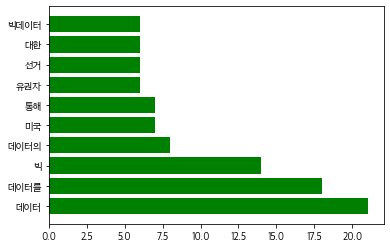

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

wcList = wc.collect()
value = [i[0] for i in wcList[:10]]
label = [i[1] for i in wcList[:10]]

plt.rc("font", family="Apple SD Gothic Neo")
plt.barh(range(len(value)), value, color='green')
plt.yticks(range(len(value)), label)
plt.show()

#### # font chech

In [32]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if "Myungjo" in font.name or "Nanum" in font.name or "Gothic" in font.name:
        print(font)

<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal 400 normal>
<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>
<Font 'Noto Sans Gothic' (NotoSansGothic-Regular.ttf) normal normal 400 normal>
<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>
<Font 'Hiragino Maru Gothic Pro' (ヒラギノ丸ゴ ProN W4.ttc) normal normal 400 normal>


## 문제 S-3: 성적 합계 및 평균

In [36]:
columns = ["name", 'subject', 'score']
scoreList = [
    ("김하나", "English", 100.),
    ("김하나", "Math", 80.),
    ("임하나", "English", 70.),
    ("임하나", "Math", 100.),
    ("김갑돌", "English", 82.3),
    ("김갑돌", "Math", 98.5)
]

In [39]:
myRdd3 = spark.sparkContext.parallelize(scoreList)
myRdd3.take(6)

[('김하나', 'English', 100.0),
 ('김하나', 'Math', 80.0),
 ('임하나', 'English', 70.0),
 ('임하나', 'Math', 100.0),
 ('김갑돌', 'English', 82.3),
 ('김갑돌', 'Math', 98.5)]

In [51]:
myRdd3\
    .map(lambda x: (x[0], x[2]))\
    .reduceByKey(
        lambda x, y: x + y)\
    .collect()

[('김하나', 100.0),
 ('김하나', 80.0),
 ('임하나', 70.0),
 ('임하나', 100.0),
 ('김갑돌', 82.3),
 ('김갑돌', 98.5)]

In [69]:
myRdd3_ = myRdd3\
    .map(lambda x: (x[0], x[2]))

myRdd3_.combineByKey(
        lambda x: (x, 1), # 첫 키일 때만 수행되는 함수
        lambda x, value: (x[0] + value, x[1] + 1),
        lambda x, y: (x[0], x[1])
    ).collect()



[('김하나', 100.0), ('김하나', 80.0), ('임하나', 70.0), ('임하나', 100.0), ('김갑돌', 82.3), ('김갑돌', 98.5)]


[('김하나', (180.0, 2)), ('임하나', (170.0, 2)), ('김갑돌', (180.8, 2))]

In [50]:
myRdd3.collect()

[('김하나', 'English', 100.0),
 ('김하나', 'Math', 80.0),
 ('임하나', 'English', 70.0),
 ('임하나', 'Math', 100.0),
 ('김갑돌', 'English', 82.3),
 ('김갑돌', 'Math', 98.5)]